# Regularization

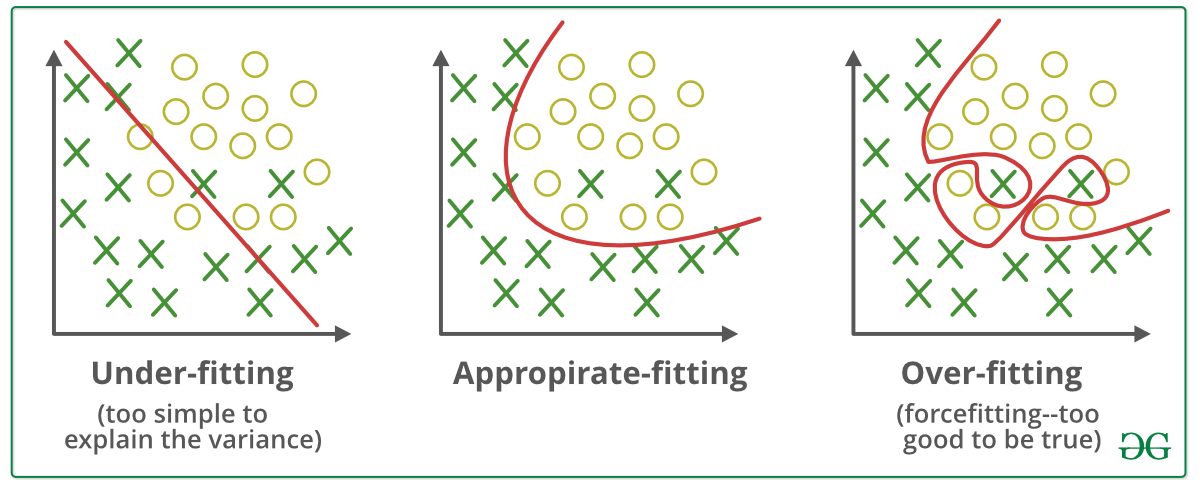

In [1]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\rr.png')

L1 Regularization technique is called LASSO(Least Absolute Shrinkage and Selection Operator) regression.

A regression model that uses L2 regularization technique is called Ridge regression. 

Lasso Regression adds “absolute value of magnitude” of coefficient as penalty term to the loss function(L). 

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function(L). 

# What is regularization?

This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

Regularization consists of different techniques and methods used to address the issue of over-fitting by reducing the generalization error without affecting the training error much. Choosing overly complex models for the training data points can often lead to overfitting.

Overfitting is a phenomenon that occurs when a Machine Learning model is constraint to training set and not able to perform well on unseen data. Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting.

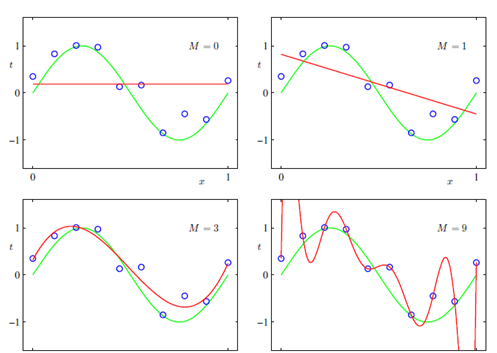

In [2]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\rr1.png')

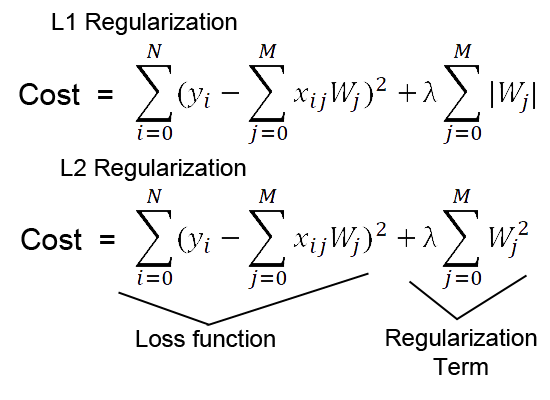

In [3]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\rr2.png')

  #What happens if the value of the regularization parameter λ is too low?

If your lambda value is too low, your model will be more complex, and you run the risk of overfitting your data. Your model will learn too much about the particularities of the training data, and won't be able to generalize to new data.

In [ ]:
########## Ridge ################
# We basically Penalizing where we have higher slope!!
# We are penalizing the features which have higher slopes!!
# Inshots ( The slope which has the higher value we just penalize it using lambda and slope^2)
# Lambda value we can select best using Cross Validation

In [ ]:
########## Lasso ################
# Lasso is not just use to overcome to the overfitting problem, it also use for Feature selection

Overfitting

What is overfitting?

Building a model that matches the training data “too closely”.

Learning from the error/distrubance/noise in the data, rather than just the truevalues/signal.

How does over-fitting occur?

Evaluating a model by testing it on the same data that was used to train it.

Creating a model that is “too complex”.

What is the impact of over-fitting?

Model will do well on the training data, but won’t generalize to out-of-sample data i.e., test

Model will have low bias, but high variance.

What are the general characteristics of linear models?

Low model complexity

High bias, low variance

Generally, Does not tend to over-fit

there is always a chance for over-fitting and it can still occur with linear models if you allow them to have high variance.


Irrelevant features

Linear models can over-fit if we include “irrelevant features”, meaning features that are unrelated to the response. Why?
Because it will learn a coefficient for every feature you include in the model, regardless of whether that feature has the impact or the noise.
This is especially a problem when p (number of features) is close to n (number of observations), because that model will naturally have high variance.

Correlated features(Multicollinearity)

Linear models can over-fit if the included features are highly correlated with one another. Why?

We use OLS (Ordinary Least Squares ) method (OLS takes some assumptions)

Large coefficients

Linear models can over-fit if the coefficients (after feature standardization) are too large. why?

Because the larger the absolute value of the coefficient, the more power it has to change the predicted response, resulting in a higher variance.

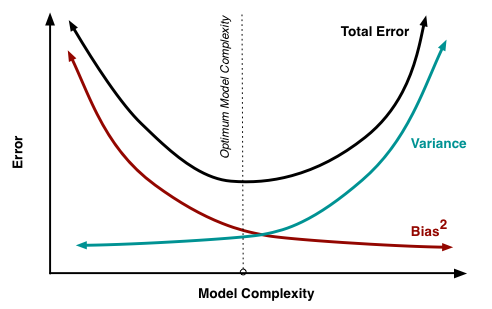

In [4]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\rr3.png')

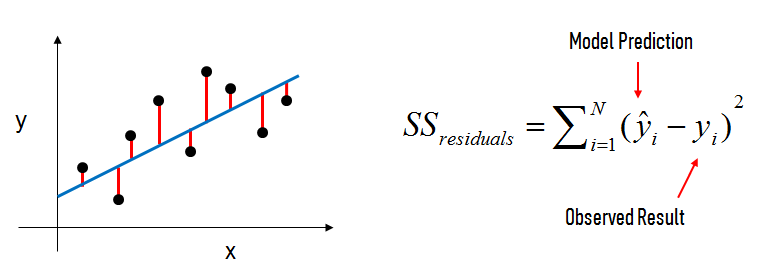

In [5]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\rr4.png')

For a regularized linear regression model, we minimize the sum of RSS and a “penalty term” that penalizes coefficient size.

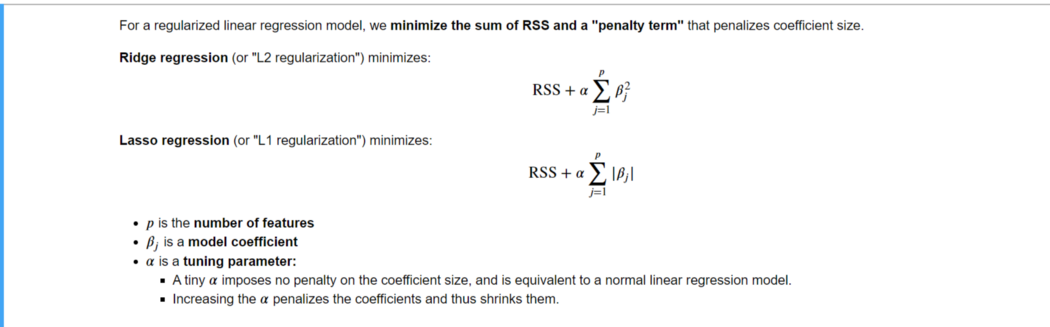

In [6]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\rr5.png')

Lasso regression shrinks coefficients all the way to zero, thus removing them from the model

Ridge regression shrinks coefficients toward zero, but they rarely reach zero

# How should we choose between Lasso regression and Ridge regression?

Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.

If model performance is your primary concern, it is best to try both.

Elastic-Net regression is a combination of lasso regression and ridge Regression.

# Should features be standardized?

Yes, because otherwise, features would be penalized simply because of their scale.

Also, standardizing avoids penalizing the intercept, which wouldn’t make intuitive sense.

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
# Reading the dataset

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'

crime = pd.read_csv(url, header=None, na_values=['?'])
crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [55]:
crime.corr()

,0,1,2,4,5,6,7,8,9,10,...,118,119,120,121,122,123,124,125,126,127
0,1.000000,0.362779,0.000430,-0.002857,-0.079569,-0.049505,-0.046154,0.213990,-0.318602,-0.210841,...,-0.040350,-0.137940,-0.021431,-0.016635,-0.067790,0.015596,-0.112931,-0.075305,-0.149106,-0.211398
1,0.362779,1.000000,0.119466,0.003296,0.146035,-0.028015,0.266509,-0.205050,-0.086395,-0.084581,...,0.205126,-0.060154,-0.118782,0.209838,0.077822,0.051657,0.136995,0.130562,-0.124780,0.093909
2,0.000430,0.119466,1.000000,-0.015922,-0.012751,0.012442,-0.021192,0.020650,0.016407,-0.020457,...,0.047383,-0.069373,-0.040662,-0.102933,-0.086734,0.149767,0.105221,0.001474,-0.027362,-0.078445
4,-0.002857,0.003296,-0.015922,1.000000,-0.007552,0.035488,0.003524,-0.004436,-0.001317,0.000915,...,0.017846,-0.012570,-0.000541,0.032115,0.000423,-0.142416,-0.039539,-0.023780,0.037132,-0.032577
5,-0.079569,0.146035,-0.012751,-0.007552,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,...,0.713652,0.231897,0.270356,0.796090,0.778311,-0.080482,0.100012,0.466352,-0.046494,0.367157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.015596,0.051657,0.149767,-0.142416,-0.080482,-0.017972,-0.168434,0.125223,0.069061,0.054310,...,-0.088810,0.111841,0.045513,-0.115349,-0.089736,1.000000,0.007179,0.047851,-0.237240,-0.082317
124,-0.112931,0.136995,0.105221,-0.039539,0.100012,-0.000784,0.022388,-0.078552,0.139501,0.057854,...,0.144122,-0.153781,-0.160937,0.078436,0.023349,0.007179,1.000000,-0.035543,-0.021100,0.116163
125,-0.075305,0.130562,0.001474,-0.023780,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,...,0.299632,0.228084,0.206644,-0.118595,-0.141782,0.047851,-0.035543,1.000000,0.042185,0.348627
126,-0.149106,-0.124780,-0.027362,0.037132,-0.046494,-0.152603,0.045311,-0.014957,-0.024774,0.004980,...,-0.148499,0.134848,0.155266,0.245532,0.259342,-0.237240,-0.021100,0.042185,1.000000,0.095961


In [56]:
crime.shape

(1994, 128)

In [58]:
crime[127].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: 127, dtype: float64

In [61]:
crime.isnull()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
2,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
1990,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
1991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

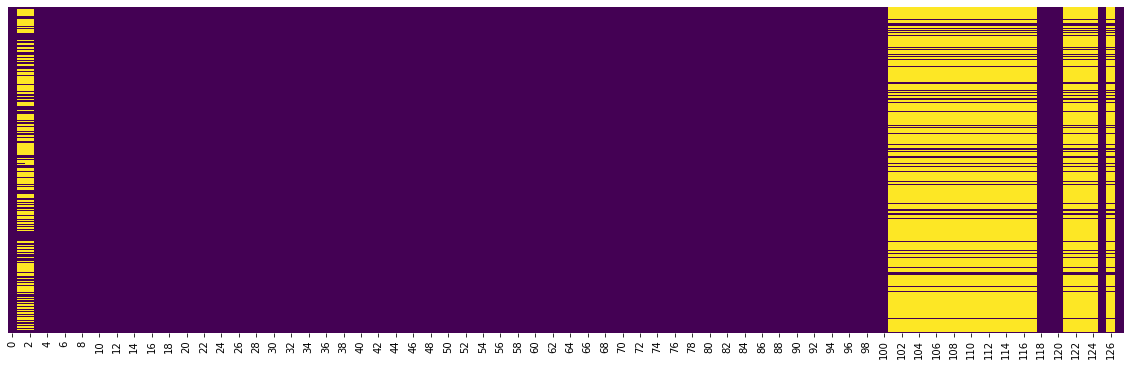

In [60]:
#Plotting Data for missing values
plt.figure(figsize=(20, 6))
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

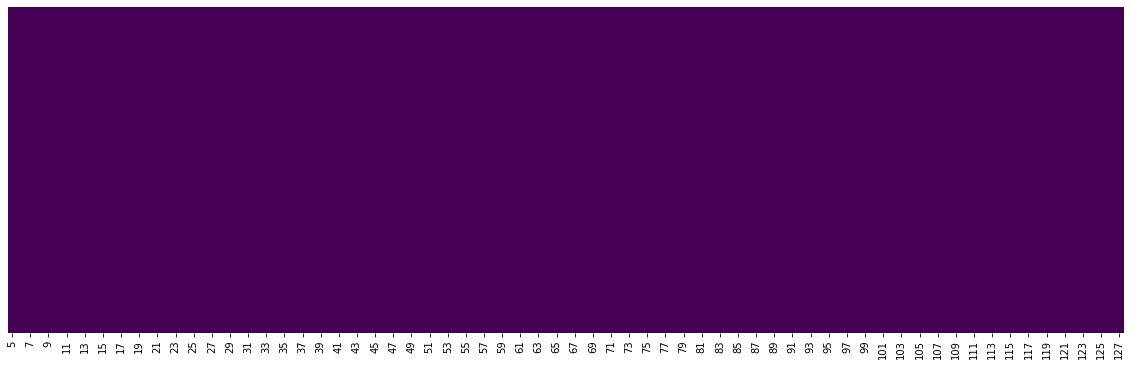

In [62]:
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)
# removing missing values
crime.dropna(inplace=True)
plt.figure(figsize=(20, 6))
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
crime.shape


(319, 123)

In [64]:
# defining X and y
X = crime.drop(127, axis=1)
y = crime[127]

In [69]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=0)

In [70]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

print ("INTERCEPT : ",linreg.intercept_)
print ("COEFFICIENT : ",linreg.coef_)

INTERCEPT :  2.9769796430133852
COEFFICIENT :  [-1.46682479e+00 -2.27923748e-01  1.34160279e-01  2.66430949e-01
 -1.91934857e-01  2.68005868e-01  1.05211447e+00 -1.47122050e+00
 -3.71963296e-01 -2.49138033e-01  1.51229782e+00  1.37582938e-01
 -1.24540250e+00 -6.77448374e-01 -1.88479444e-01 -8.48005959e-01
 -7.88138670e-01  3.62377997e-01  3.61056652e-01  1.42337973e+00
 -8.07627239e-01 -1.27740597e-03 -5.65515034e-01  6.58259079e-02
  2.52090360e-02  9.20180413e-02 -3.20088364e-01 -4.65436957e-01
  2.64068704e-01 -2.05082993e-01 -7.25239852e-02 -5.88948412e-01
  2.83239819e-01  1.59677547e+00 -3.24740797e-01 -1.16798843e-01
  8.66850756e-01  1.92257769e+00  1.43650534e+00  1.95485727e-01
  1.00868578e+00 -3.30706064e+00 -3.31672367e-01 -3.95634079e-01
 -1.65056394e+00  3.58329059e-01  1.41766859e-01 -3.55733023e-01
  1.69408851e-01  2.23352458e-01 -4.19374920e-01  8.03128630e-02
  7.63697981e-03 -2.00933174e-01 -1.00165303e+00  1.55833951e+00
  1.41329057e-01 -1.06437467e+00  4.1771368

In [71]:
y_pred = linreg.predict(X_test)

In [72]:
# calculate R^2 value, MAE, MSE, RMSE

from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.2536239215016668


mean_absolute_error : 0.1782995682576347


mean_squared_error :  0.053260153001510234


root_mean_squared_error :  0.23078161322234975


MSE is more popular than MAE because MSE "eliminates" larger errors. But, RMSE is even more better than MSE because RMSE is interpretable in the "y" units.

# Ridge regression

alpha: must be positive, increase for more regularization
    
normalize: scales the features (without using StandardScaler)

In [37]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.19704456295837192


mean_absolute_error : 0.16725155824818624


mean_squared_error :  0.04986345422666821


root_mean_squared_error :  0.22330126337902392


In [73]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.5211075405813801


mean_absolute_error : 0.14168561921888387


mean_squared_error :  0.034172967750013696


root_mean_squared_error :  0.18485931880761028


In [74]:
print(ridgereg.coef_)

[-3.81834240e-02  2.90205902e-02  5.15257625e-02 -4.32175354e-02
 -3.49999374e-02  6.48807737e-02  9.42559490e-02 -1.13342146e-01
 -5.36515096e-02  8.07391256e-02 -3.31173597e-02  1.17227488e-02
  3.08600898e-03 -7.90340453e-02 -8.35314514e-02 -3.50658231e-01
 -4.07650461e-02  7.63030961e-02 -4.76097861e-02  1.89621132e-02
 -3.93559983e-02  5.49494204e-02 -2.50239291e-01  1.19764582e-01
  1.17857123e-01  2.50220518e-02 -2.75408313e-02 -7.54720521e-02
 -3.05076911e-02 -7.27860391e-02 -6.87280953e-02  7.86964870e-03
  8.18394363e-02  5.76641020e-02 -6.23143663e-02  7.58086751e-02
  9.63407088e-02  1.31048183e-01 -4.11013032e-02  3.22434426e-02
 -3.59442652e-02 -4.34519742e-02  4.53451277e-02 -1.44100924e-01
 -1.90689648e-01 -1.28949722e-01 -1.66571170e-01 -1.66179986e-02
  8.48584776e-02 -3.46067401e-02  7.28395302e-02 -2.61225845e-02
 -1.62467371e-01 -8.65940244e-02  1.30446581e-01  1.68482851e-01
  1.49105710e-02  2.49284257e-02  5.88489183e-02  4.23665554e-02
 -2.38263706e-02  2.16974

In [43]:
from numpy import array

In [75]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range = array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

1.0

In [76]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)

In [78]:
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R-Square Value 0.6050617315208547


mean_absolute_error : 0.1302495843947799


mean_squared_error :  0.028182136608224342


root_mean_squared_error :  0.1678753603368414


# Lasso regression

alpha: must be positive, increase for more regularization
    
normalize: scales the features (without using StandardScaler)

In [84]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.          0.          0.06930533 -0.07097923 -0.          0.
 -0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.16662792  0.          0.
 -0.         -0.         -0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.00420705  0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.58900643 -0.         -0.         -0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.07936997 -0.          0.
 -0.04692951  0.          0.         -0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.          0.
  0.17637525  0.         

In [82]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.          0.          0.         -0.         -0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.32239819 -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.         

In [86]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.6198595889389453


mean_absolute_error : 0.1304947405592622


mean_squared_error :  0.02712618616596509


root_mean_squared_error :  0.1647002919425618


In [87]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)

alpha :  0.0012618778231985547


In [88]:
y_pred = lassoregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.6211163770253247


mean_absolute_error : 0.13068073691566748


mean_squared_error :  0.02703650386276787


root_mean_squared_error :  0.16442780744985888


In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [99]:
crime

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.00,0.29,0.21,0.29,1.00,0.26,0.24,0.47,0.28,0.46,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
1981,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.09,0.13,0.17,0.02,0.01,0.72,0.0,0.62,0.15,0.07
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19
